139


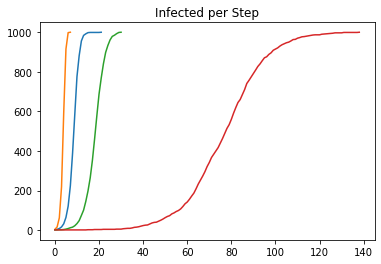

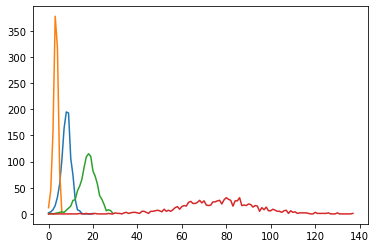

In [42]:
import numpy as np
import random as r
from matplotlib import pyplot as plt

def infection(n, b, succ_chance): 
    nodes = np.zeros(n)
    nodes[r.randint(0,n-1)] = 1

    infected = 1
    infections = []

    while infected < len(nodes):
        for i in range(infected):
            for j in range(b):
                target = r.randint(0, n-1)
                die = r.randint(1, 100)
                if nodes[target] == 0 and die <= succ_chance:
                    nodes[target] = 1
                    infected += 1
        infections.append(infected)
    return infections

infections = infect(n=1000, b=1, succ_chance=100)
plt.plot(infections)
d1 = [infections[i]-infections[i-1] for i in range(1, len(infections))]

infections = infect(n=1000, b=3, succ_chance=100)
plt.plot(infections)
d2 = [infections[i]-infections[i-1] for i in range(1, len(infections))]

infections = infect(n=1000, b=1, succ_chance=50)
plt.plot(infections)
d3 = [infections[i]-infections[i-1] for i in range(1, len(infections))]

infections = infect(n=1000, b=1, succ_chance=10)
plt.plot(infections)
d4 = [infections[i]-infections[i-1] for i in range(1, len(infections))]
print(len(infections))
plt.title("Infected per Step")
plt.show()


plt.plot(d1)
plt.plot(d2)
plt.plot(d3)
plt.plot(d4)
plt.show()

In [134]:
def infection(n, b, p): 
    nodes = np.zeros(n)
    infection_time = [-1 for i in range(n)]

    patient_zero = r.randint(0,n-1)
    nodes[patient_zero] = 1
    infection_time[patient_zero] = 0
    infected = 1
    infections = [1]
    time_step = 0
    
    immune = 0
    immunity = []
    
    while infected < len(nodes) and infected > 0:
        time_step += 1
        
        # Every infected nodes tries to infect
        for i in range(infected):
            for j in range(b):
                target = r.randint(0, n-1)
                die = r.randint(1, 100)
                if nodes[target] == 0 and die <= p:
                    nodes[target] = 1
                    infected += 1
                    infection_time[target] = time_step
                    
        # Every infected gets immunity after 10 timesteps
        for i in range(len(infection_time)):
            if time_step - infection_time[i] >= r.randint(0,100) and nodes[i] == 1:
                nodes[i] = 2
                immune += 1
                infected -= 1
        
        
        immunity.append(immune)
        infections.append(infected)
        
        if infections[time_step] == 0 and infections[time_step-1] == 0:
            break

    return infections, immunity



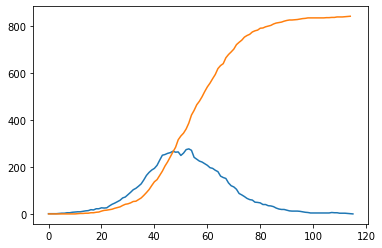

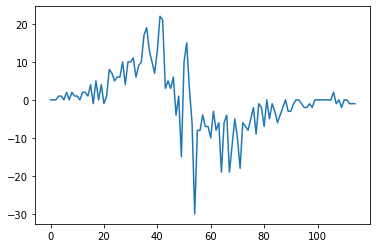

In [136]:
infections, immunity = infection(n=1000, b=1, p=20)
plt.plot(infections)
plt.plot(immunity)
plt.show()
d1 = [infections[i]-infections[i-1] for i in range(1, len(infections))]
plt.plot(d1)